
Top Genders with Mule Accounts:
Gender
Female     28.0
Male       34.0
Missing     3.0
Name: MuleAccount, dtype: float64

Top predictors Combinations for Mule Accounts (AgeGroup & Gender):
AgeGroup  Gender
46-60     Female    12.0
25-35     Male      10.0
36-45     Male       9.0
18-24     Male       6.0
46-60     Male       6.0
Name: MuleAccount, dtype: float64


C:\Users\jessi\AppData\Local\Temp\ipykernel_3320\1627218054.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combos = data.groupby(['AgeGroup', 'Gender'])['MuleAccount'].sum().sort_values(ascending=False).head(5)


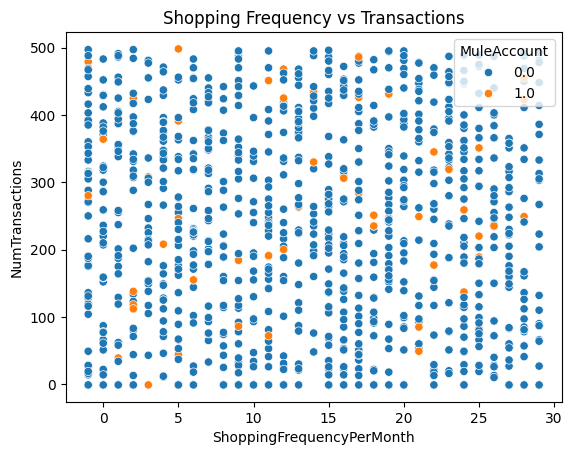

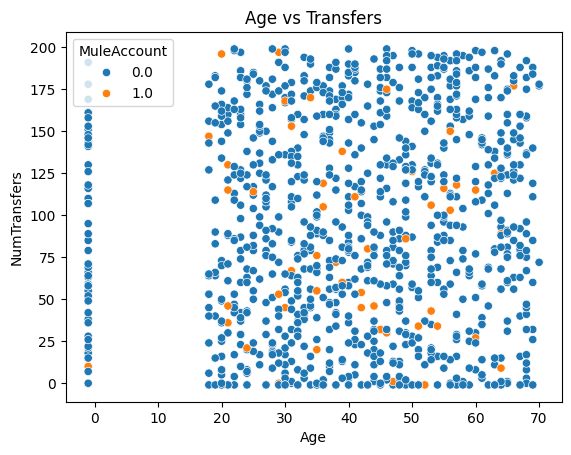

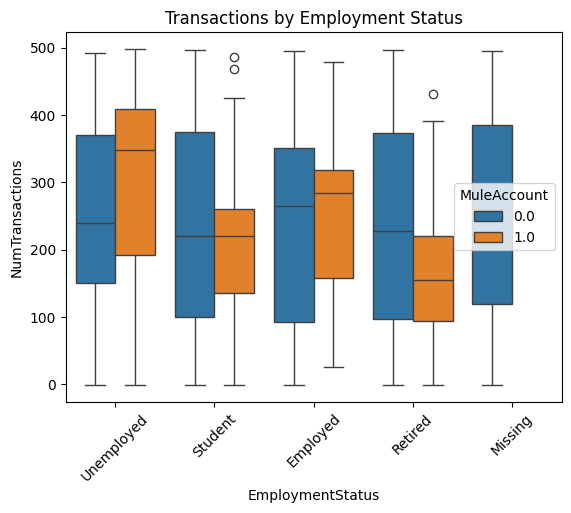

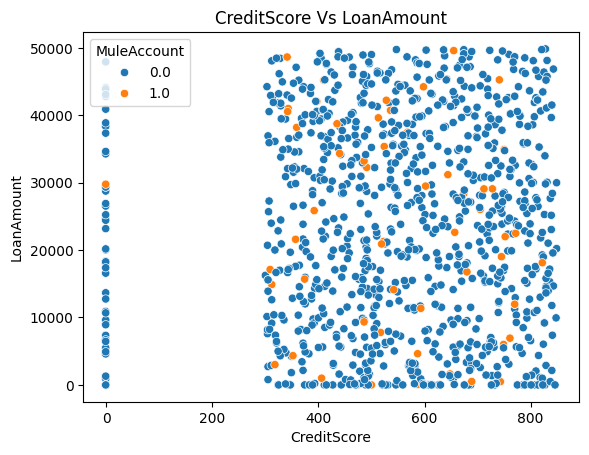

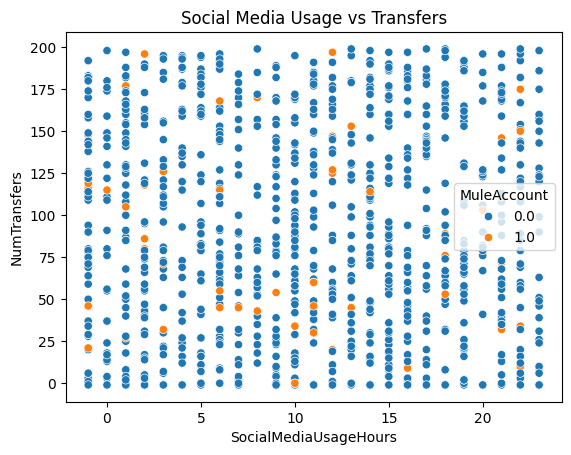

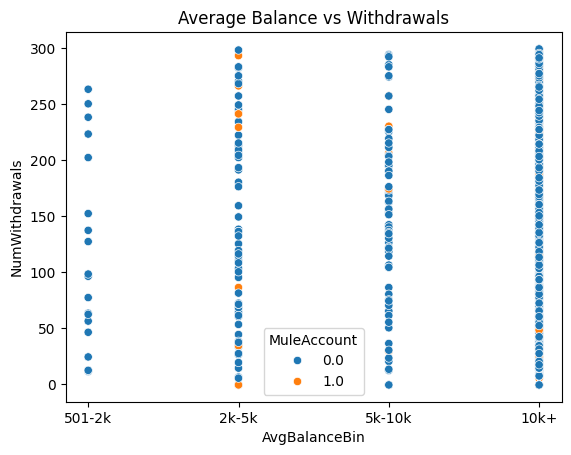

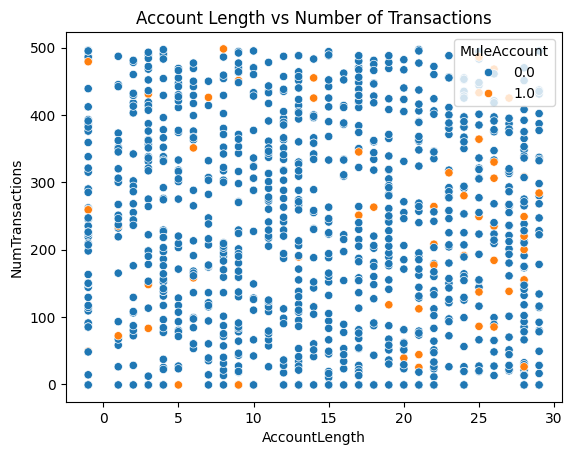

C:\Users\jessi\AppData\Local\Temp\ipykernel_3320\1627218054.py:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("AgeGroup")["MuleAccount"].sum().plot(kind="bar", title="Mule Accounts by Age Group", color='skyblue')


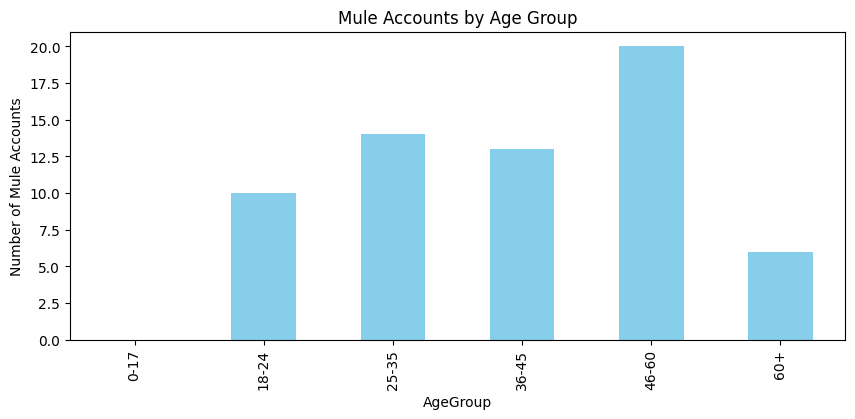

C:\Users\jessi\AppData\Local\Temp\ipykernel_3320\1627218054.py:98: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat_data = data.pivot_table(


Text(0.5, 1.0, 'Mule Accounts by Income Group and Number of Savings Accounts')

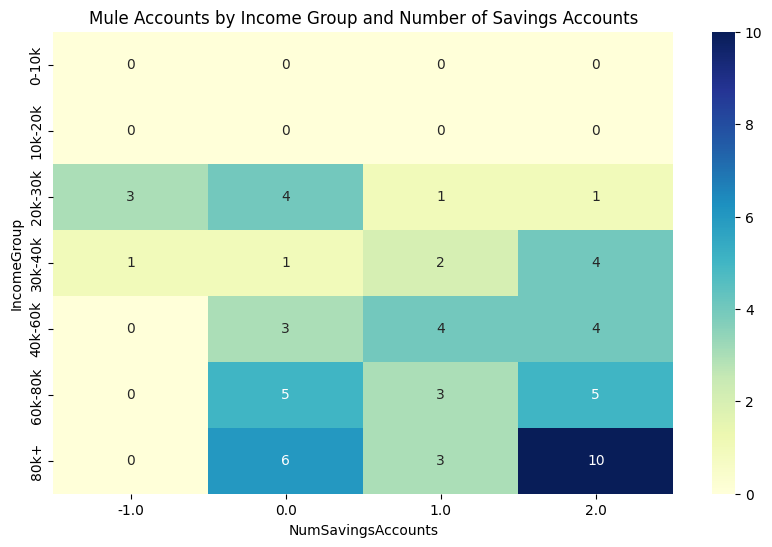

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Loading data
accounts = pd.read_csv(r"C:\Users\jessi\Downloads\wetransfer_mule-flag-csv_2025-05-19_1548\Step Up - Experian Account Data.csv")
holders = pd.read_csv(r"C:\Users\jessi\Downloads\wetransfer_mule-flag-csv_2025-05-19_1548\Step Up - Experian Acount Holder Data.csv")
mules = pd.read_csv(r"C:\Users\jessi\Desktop\Mule Flag.csv")

# Fill missing values -1 for all the integer values as -1 be won't affect the analysis & Missing for Strings.
accounts.fillna(-1, inplace=True)
holders.fillna({
    'DateOfBirth': 'Missing',
    'Gender': 'Missing',
    'Income': -1,
    'CreditScore': -1,
    'LoanAmount': -1,
    'EmploymentStatus': 'Missing',
    'MaritalStatus': 'Missing',
    'OccupancyStatus': 'Missing',
    'NumDependents': -1,
    'SocialMediaUsageHours': -1,
    'ShoppingFrequencyPerMonth': -1,
    'HealthInsuranceStatus': 'Missing'
}, inplace=True)
mules.fillna(0, inplace=True)


# Merging datasets
data = accounts.merge(holders, on='Identifier').merge(mules, on='Identifier')
data.drop_duplicates()

# Data Creation
# Converting DOB to Age
today = datetime.today()
data['DateOfBirth'] = pd.to_datetime(data['DateOfBirth'], format='%d/%m/%Y', errors='coerce')
data['Age'] = data['DateOfBirth'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)) if pd.notnull(x) else -1)

# Create AgeGroup and IncomeGroup
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 17, 24, 35, 45, 60, 100], labels=['0-17', '18-24', '25-35', '36-45', '46-60', '60+'])
data['IncomeGroup'] = pd.cut(data['Income'], bins=[0, 10000, 20000, 30000, 40000, 60000, 80000, 100000], labels=['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-60k', '60k-80k','80k+'])
# Binning social media usage
data['SocialMediaBin'] = pd.cut(data['SocialMediaUsageHours'],
                                   bins=[-1, 0, 5, 10, 20, 40, 100],
                                   labels=['0', '1-5', '6-10', '11-20', '21-40', '40+'])

# Binning average balance
data['AvgBalanceBin'] = pd.cut(data['AverageBalance'],
                                  bins=[-1, 0, 500, 2000, 5000, 10000, 50000],
                                  labels=['0', '1-500', '501-2k', '2k-5k', '5k-10k', '10k+'])

# Binning account age
data['AccountAgeBin'] = pd.cut(data['AccountLength'],
                                  bins=[-1, 3, 6, 12, 24, 60, 120],
                                  labels=['<3 mo', '3-6 mo', '6-12 mo', '1-2 yr', '2-5 yr', '5+ yr'])
#Data Analysis
print("\nTop Genders with Mule Accounts:")
print(data.groupby("Gender")["MuleAccount"].sum())

print("\nTop predictors Combinations for Mule Accounts (AgeGroup & Gender):")
combos = data.groupby(['AgeGroup', 'Gender'])['MuleAccount'].sum().sort_values(ascending=False).head(5)
print(combos)

#Data Visualization
sns.scatterplot(data, x='ShoppingFrequencyPerMonth', y='NumTransactions', hue='MuleAccount')
plt.title("Shopping Frequency vs Transactions")
plt.show()

sns.scatterplot(data, x='Age', y='NumTransfers', hue='MuleAccount')
plt.title("Age vs Transfers")
plt.show()
sns.boxplot(data, x='EmploymentStatus', y='NumTransactions', hue='MuleAccount')
plt.title("Transactions by Employment Status")
plt.xticks(rotation=45)
plt.show()

sns.scatterplot(data, x='CreditScore', y='LoanAmount', hue='MuleAccount')
plt.title("CreditScore Vs LoanAmount")
plt.show()

sns.scatterplot(data, x='SocialMediaUsageHours', y='NumTransfers', hue='MuleAccount')
plt.title("Social Media Usage vs Transfers")
plt.show()
sns.scatterplot(data, x='AvgBalanceBin', y='NumWithdrawals', hue='MuleAccount')
plt.title("Average Balance vs Withdrawals")
plt.show()
sns.scatterplot(data, x='AccountLength', y='NumTransactions', hue='MuleAccount')
plt.title("Account Length vs Number of Transactions")
plt.show()

plt.figure(figsize=(10, 4))
data.groupby("AgeGroup")["MuleAccount"].sum().plot(kind="bar", title="Mule Accounts by Age Group", color='skyblue')
plt.ylabel("Number of Mule Accounts")
plt.show()

plt.figure(figsize=(10, 6))
heat_data = data.pivot_table(
    index='IncomeGroup',
    columns='NumSavingsAccounts',
    values='MuleAccount',
    aggfunc='sum'
)

sns.heatmap(heat_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Mule Accounts by Income Group and Number of Savings Accounts")